In [2]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
SPOTIPY_CLIENT_ID = 'Your Client ID'
SPOTIPY_CLIENT_SECRET= "Your Client Secret"
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [6]:
all_letters = 'a b c d e f g h i j k l m n o p r s t u y z q x w 0 1 2 3 4 5 6 7 8 9'
starts = all_letters.split()
print(starts)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y', 'z', 'q', 'x', 'w', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [7]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)
    
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    
    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [8]:
def get_songs():
    tracks = []
    for i in starts:
        song=sp.search(i,limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
    return df

In [9]:
df = get_songs()
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Ain't Shit,Planet Her,Doja Cat,2021-06-25,174253,90,0.855,0.506000,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4
1,Astronaut In The Ocean,Astronaut In The Ocean,Masked Wolf,2021-01-06,132780,90,0.778,0.175000,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4
2,Wants and Needs (feat. Lil Baby),Scary Hours 2,Drake,2021-03-05,192956,88,0.578,0.061800,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4
3,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,83,0.671,0.076900,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
4,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,95,0.677,0.321000,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,90's Love,NCT RESONANCE Pt. 2 - The 2nd Album,NCT,2020-11-23,213666,56,0.743,0.068800,0.924,0.000000,0.1120,-1.501,0.0642,107.995,4
1746,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,191560,63,0.405,0.084300,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1747,94 Bentley,Ghetto Lenny's Love Songs,SAINt JHN,2019-08-23,169405,58,0.706,0.079200,0.558,0.000000,0.1620,-5.253,0.0525,112.975,4
1748,9-3 Freestyle,The House Is Burning,Isaiah Rashad,2021-07-30,105911,46,0.867,0.000549,0.537,0.154000,0.0608,-9.475,0.2080,144.994,4


In [10]:
df.to_csv("spotify_data.csv", sep=',')

In [11]:
df = pd.read_csv("spotify_data.csv")


In [12]:
df


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Ain't Shit,Planet Her,Doja Cat,2021-06-25,174253,90,0.855,0.506000,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4
1,1,Astronaut In The Ocean,Astronaut In The Ocean,Masked Wolf,2021-01-06,132780,90,0.778,0.175000,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4
2,2,Wants and Needs (feat. Lil Baby),Scary Hours 2,Drake,2021-03-05,192956,88,0.578,0.061800,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4
3,3,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,83,0.671,0.076900,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
4,4,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,95,0.677,0.321000,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,90's Love,NCT RESONANCE Pt. 2 - The 2nd Album,NCT,2020-11-23,213666,56,0.743,0.068800,0.924,0.000000,0.1120,-1.501,0.0642,107.995,4
1746,1746,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,191560,63,0.405,0.084300,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1747,1747,94 Bentley,Ghetto Lenny's Love Songs,SAINt JHN,2019-08-23,169405,58,0.706,0.079200,0.558,0.000000,0.1620,-5.253,0.0525,112.975,4
1748,1748,9-3 Freestyle,The House Is Burning,Isaiah Rashad,2021-07-30,105911,46,0.867,0.000549,0.537,0.154000,0.0608,-9.475,0.2080,144.994,4


In [13]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1750 non-null   object 
 1   album             1750 non-null   object 
 2   artist            1750 non-null   object 
 3   release_date      1750 non-null   object 
 4   length            1750 non-null   int64  
 5   popularity        1750 non-null   int64  
 6   danceability      1750 non-null   float64
 7   acousticness      1750 non-null   float64
 8   energy            1750 non-null   float64
 9   instrumentalness  1750 non-null   float64
 10  liveness          1750 non-null   float64
 11  loudness          1750 non-null   float64
 12  speechiness       1750 non-null   float64
 13  tempo             1750 non-null   float64
 14  time_signature    1750 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 205.2+ KB


In [14]:
df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,200482.733714,71.031429,0.650081,0.250120,0.613045,0.045923,0.187749,-7.414792,0.127170,122.545703,3.959429
std,57150.311460,23.247928,0.170252,0.275964,0.189881,0.178039,0.151647,4.541473,0.119002,30.026238,0.338259
min,21937.000000,0.000000,0.000000,0.000025,0.000050,0.000000,0.032700,-38.615000,0.000000,0.000000,0.000000
25%,167908.250000,68.000000,0.554000,0.033925,0.511000,0.000000,0.098600,-8.025750,0.042700,97.172750,4.000000
50%,198310.000000,78.000000,0.671000,0.135000,0.639000,0.000000,0.124000,-6.414000,0.072050,123.999000,4.000000
75%,227395.000000,83.000000,0.776000,0.385000,0.738000,0.000070,0.219000,-5.165500,0.168750,142.347000,4.000000
max,943528.000000,100.000000,0.980000,0.994000,1.000000,0.992000,0.968000,-1.304000,0.949000,211.968000,5.000000


In [15]:
df['length'] = df['length'] / 60000

In [16]:
df.sort_values("name", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1677,『82.99 F.M』,A Millions Miles Away,Macross 82-99,2014-05-07,2.504333,57,0.559,0.0155,0.9050,0.002830,0.3160,-5.362,0.1500,114.830,4
1080,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,78,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1021,you should see me in a crown,Badass Females,Various Artists,2021-08-08,3.009433,0,0.683,0.5190,0.5340,0.247000,0.1480,-10.348,0.1890,150.469,4
1005,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,86,0.667,0.7850,0.3730,0.000000,0.0906,-9.389,0.0500,124.148,4
641,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,86,0.667,0.7850,0.3730,0.000000,0.0906,-9.389,0.0500,124.148,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,0 Mile,NCT #127 CHERRY BOMB– The 3rd Mini Album,NCT 127,2017-06-14,3.395350,51,0.652,0.0111,0.9150,0.000025,0.2600,-4.126,0.0452,118.012,4
1397,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,80,0.792,0.1240,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
24,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,80,0.792,0.1240,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
928,'Till I Collapse,The Eminem Show,Eminem,2002-05-26,4.963100,83,0.548,0.0622,0.8470,0.000000,0.0816,-3.237,0.1860,171.447,4


In [17]:
df.drop_duplicates(keep='first', inplace=True)
df.sort_values("name", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1677,『82.99 F.M』,A Millions Miles Away,Macross 82-99,2014-05-07,2.504333,57,0.559,0.0155,0.9050,0.002830,0.3160,-5.362,0.1500,114.830,4
1080,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,78,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1021,you should see me in a crown,Badass Females,Various Artists,2021-08-08,3.009433,0,0.683,0.5190,0.5340,0.247000,0.1480,-10.348,0.1890,150.469,4
641,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,86,0.667,0.7850,0.3730,0.000000,0.0906,-9.389,0.0500,124.148,4
1156,xanny,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,4.062083,73,0.521,0.7510,0.1250,0.002070,0.2650,-17.832,0.2390,111.554,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,2016-11-24,5.595600,67,0.894,0.1550,0.7210,0.000000,0.1540,-5.829,0.2580,107.963,4
1292,0 Mile,NCT #127 CHERRY BOMB– The 3rd Mini Album,NCT 127,2017-06-14,3.395350,51,0.652,0.0111,0.9150,0.000025,0.2600,-4.126,0.0452,118.012,4
24,"...And to Those I Love, Thanks for Sticking Ar...",Stop Staring at the Shadows,$uicideboy$,2020-02-14,2.808150,80,0.792,0.1240,0.5110,0.000090,0.1400,-6.876,0.0409,113.983,4
928,'Till I Collapse,The Eminem Show,Eminem,2002-05-26,4.963100,83,0.548,0.0622,0.8470,0.000000,0.0816,-3.237,0.1860,171.447,4


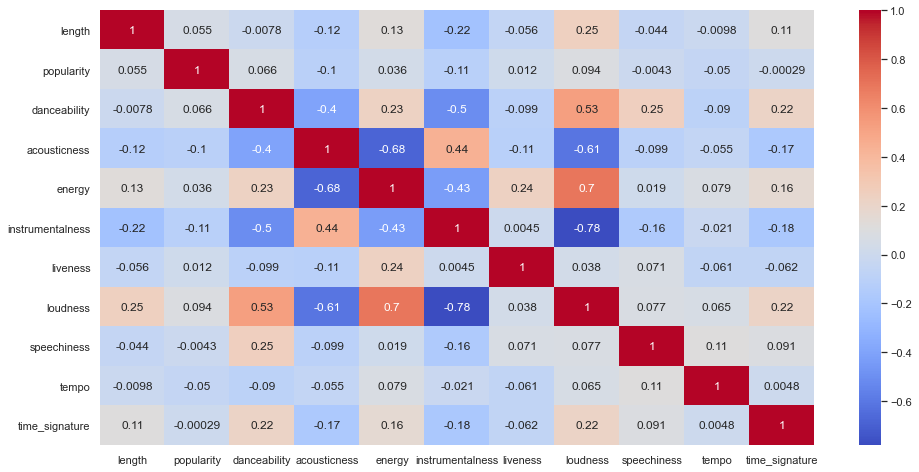

In [18]:

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [19]:
df3 = df.drop(['name','album','artist',"popularity"],axis=1)
df3

,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,2021-06-25,2.904217,0.855,0.506000,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4
1,2021-01-06,2.213000,0.778,0.175000,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4
2,2021-03-05,3.215933,0.578,0.061800,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4
3,2018-12-10,2.763650,0.671,0.076900,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
4,2021-03-19,3.301350,0.677,0.321000,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4
...,...,...,...,...,...,...,...,...,...,...,...
1745,2020-11-23,3.561100,0.743,0.068800,0.924,0.000000,0.1120,-1.501,0.0642,107.995,4
1746,2008-03-21,3.192667,0.405,0.084300,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1747,2019-08-23,2.823417,0.706,0.079200,0.558,0.000000,0.1620,-5.253,0.0525,112.975,4
1748,2021-07-30,1.765183,0.867,0.000549,0.537,0.154000,0.0608,-9.475,0.2080,144.994,4


In [21]:
df3['release_date']=df3['release_date'].astype('str')
df3.info

<bound method DataFrame.info of      release_date    length  danceability  acousticness  energy  \
0      2021-06-25  2.904217         0.855      0.506000   0.488   
1      2021-01-06  2.213000         0.778      0.175000   0.695   
2      2021-03-05  3.215933         0.578      0.061800   0.449   
3      2018-12-10  2.763650         0.671      0.076900   0.529   
4      2021-03-19  3.301350         0.677      0.321000   0.696   
...           ...       ...           ...           ...     ...   
1745   2020-11-23  3.561100         0.743      0.068800   0.924   
1746   2008-03-21  3.192667         0.405      0.084300   0.689   
1747   2019-08-23  2.823417         0.706      0.079200   0.558   
1748   2021-07-30  1.765183         0.867      0.000549   0.537   
1749   1994-03-08  6.216667         0.547      0.000242   0.714   

      instrumentalness  liveness  loudness  speechiness    tempo  \
0             0.000000    0.3470    -4.601       0.2080  124.097   
1             0.000000    0

In [22]:
df3['release_year']=df3['release_date'].str.slice(0,4,1)
df3.head(n=10)

,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,release_year
0,2021-06-25,2.904217,0.855,0.5060,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4,2021
1,2021-01-06,2.213000,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,2021
2,2021-03-05,3.215933,0.578,0.0618,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4,2021
3,2018-12-10,2.763650,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,2018
4,2021-03-19,3.301350,0.677,0.3210,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4,2021
5,2019-03-07,3.060400,0.450,0.8180,0.329,0.001090,0.1350,-12.603,0.0441,71.884,3,2019
6,2021-06-24,4.355567,0.743,0.1140,0.655,0.000000,0.0764,-5.015,0.1590,172.031,4,2021
7,2021-04-23,3.183550,0.650,0.0215,0.825,0.000024,0.0936,-4.645,0.0325,118.091,4,2021
8,2017-03-06,3.645900,0.331,0.3650,0.450,0.004640,0.2200,-5.362,0.0340,123.829,4,2017
9,2021-06-10,5.049167,0.352,0.7330,0.424,0.000023,0.0664,-10.131,0.0394,127.047,4,2021


In [23]:
df3.head(n=10)

,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,release_year
0,2021-06-25,2.904217,0.855,0.5060,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4,2021
1,2021-01-06,2.213000,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,2021
2,2021-03-05,3.215933,0.578,0.0618,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4,2021
3,2018-12-10,2.763650,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,2018
4,2021-03-19,3.301350,0.677,0.3210,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4,2021
5,2019-03-07,3.060400,0.450,0.8180,0.329,0.001090,0.1350,-12.603,0.0441,71.884,3,2019
6,2021-06-24,4.355567,0.743,0.1140,0.655,0.000000,0.0764,-5.015,0.1590,172.031,4,2021
7,2021-04-23,3.183550,0.650,0.0215,0.825,0.000024,0.0936,-4.645,0.0325,118.091,4,2021
8,2017-03-06,3.645900,0.331,0.3650,0.450,0.004640,0.2200,-5.362,0.0340,123.829,4,2017
9,2021-06-10,5.049167,0.352,0.7330,0.424,0.000023,0.0664,-10.131,0.0394,127.047,4,2021


In [24]:
df3 = df3.drop(["release_date"],axis=1)

In [25]:
df3.head()

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,release_year
0,2.904217,0.855,0.5060,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4,2021
1,2.213000,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,2021
2,3.215933,0.578,0.0618,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4,2021
3,2.763650,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,2018
4,3.301350,0.677,0.3210,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4,2021


In [26]:
df3.nunique()

length              1140
danceability         556
acousticness         856
energy               596
instrumentalness     493
liveness             532
loudness            1101
speechiness          677
tempo               1158
time_signature         5
release_year          52
dtype: int64

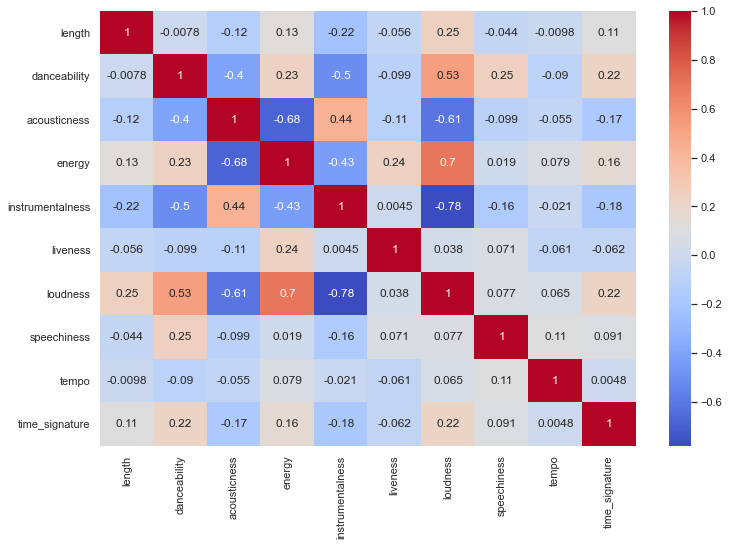

In [30]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
corr = df3.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [44]:
df3['release_year']=df3['release_year'].astype('int64')
df3.sort_values("release_year", ascending=False)

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,release_year
0,2.904217,0.855,0.5060,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4,2021
841,2.606117,0.870,0.0124,0.561,0.000000,0.1030,-10.388,0.1860,100.458,4,2021
818,2.519100,0.652,0.1500,0.595,0.000106,0.0836,-4.040,0.1170,172.277,4,2021
821,3.389733,0.386,0.8070,0.426,0.000000,0.1400,-6.642,0.0363,180.104,3,2021
822,2.816833,0.682,0.3260,0.720,0.000000,0.1480,-8.173,0.0381,117.003,4,2021
...,...,...,...,...,...,...,...,...,...,...,...
1473,3.095550,0.557,0.0339,0.540,0.002480,0.1790,-10.484,0.0347,129.171,4,1969
266,2.346217,0.640,0.2010,0.663,0.008060,0.1520,-7.516,0.0374,132.770,4,1969
48,2.527767,0.663,0.4300,0.600,0.000000,0.1840,-10.870,0.0320,129.991,4,1967
1269,2.547767,0.831,0.1550,0.650,0.262000,0.1050,-4.508,0.0601,101.681,4,1967


## No trend established due to skewed data in favour of more recently released songs

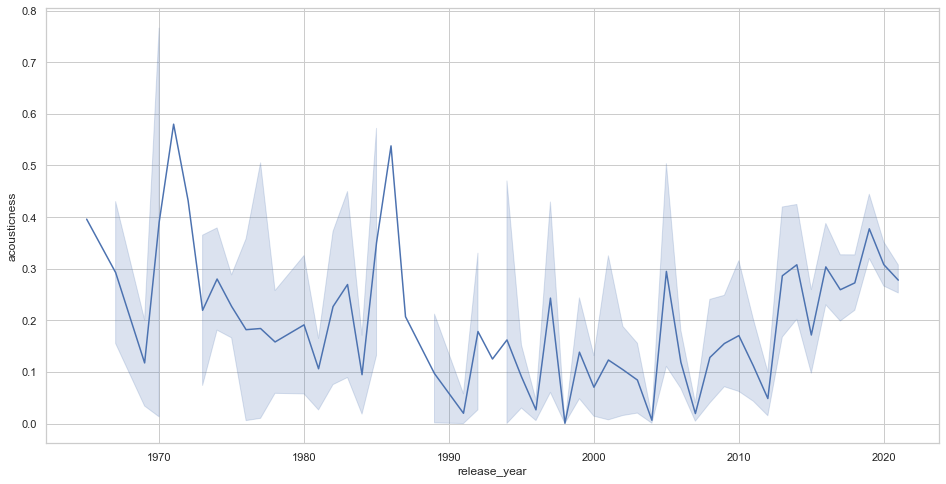

In [45]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(y=df3.acousticness, x=df3.release_year,data=df)


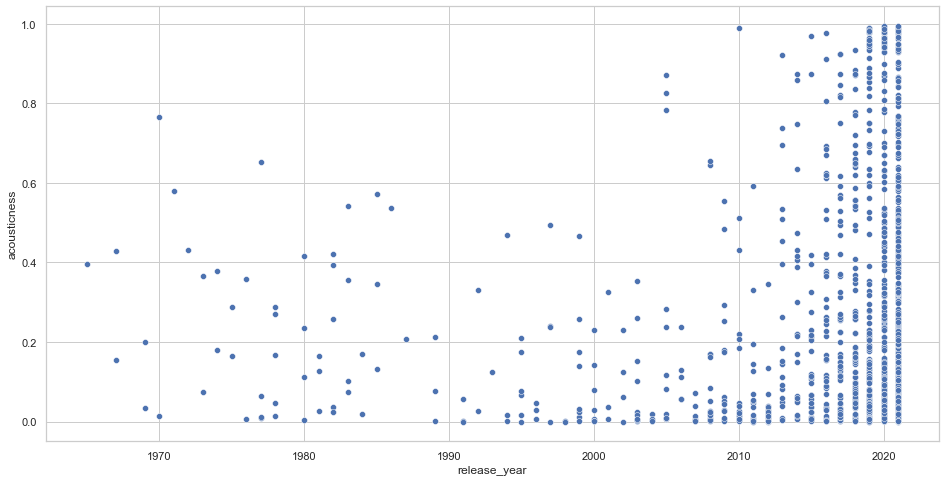

In [46]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(y=df3.acousticness, x=df3.release_year,data=df)

In [47]:
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)
df3

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,release_year
0,-0.455765,1.179354,0.822033,-0.574815,-0.301124,1.040327,0.624712,0.651724,0.060467,0.14298,0.544761
1,-1.129287,0.751702,-0.318366,0.434340,-0.301124,-0.242872,0.190401,-0.297237,0.894996,0.14298,0.544761
2,-0.152028,-0.359081,-0.708375,-0.764945,-0.301113,-0.444797,0.289387,1.285992,0.444204,0.14298,0.544761
3,-0.592733,0.157433,-0.656351,-0.374934,-0.299519,-0.662354,0.121149,1.456756,1.281441,0.14298,0.235442
4,-0.068798,0.190757,0.184650,0.439216,-0.301124,1.515827,0.321615,-0.071991,-1.037256,0.14298,0.544761
...,...,...,...,...,...,...,...,...,...,...,...
1212,0.184303,0.557315,-0.684258,1.550748,-0.301124,-0.490393,1.219396,-0.517604,-0.458379,0.14298,0.441655
1213,-0.174699,-1.319908,-0.630855,0.405089,-0.301124,0.128409,0.404295,-0.742850,1.062328,0.14298,-0.795622
1214,-0.534496,0.351820,-0.648427,-0.233554,-0.301124,-0.164708,0.499637,-0.612744,-0.297912,0.14298,0.338548
1215,-1.565640,1.246001,-0.919404,-0.335932,0.436675,-0.823894,-0.310285,0.651724,0.733820,0.14298,0.544761


In [49]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=1000, random_state=42)
    model.fit(df3)
    wcss.append(model.inertia_)

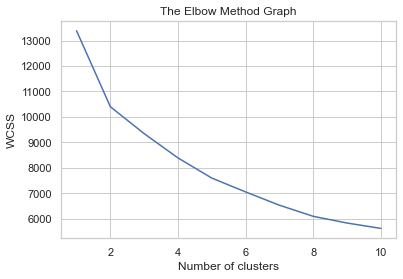

In [50]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=500, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df3)

In [53]:
df['cluster'] = y_kmeans
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Ain't Shit,Planet Her,Doja Cat,2021-06-25,2.904217,90,0.855,0.506000,0.488,0.000000,0.3470,-4.601,0.2080,124.097,4,4
1,Astronaut In The Ocean,Astronaut In The Ocean,Masked Wolf,2021-01-06,2.213000,90,0.778,0.175000,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,2
2,Wants and Needs (feat. Lil Baby),Scary Hours 2,Drake,2021-03-05,3.215933,88,0.578,0.061800,0.449,0.000002,0.1190,-6.349,0.2860,136.006,4,4
3,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,83,0.671,0.076900,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,4
4,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,3.301350,95,0.677,0.321000,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,90's Love,NCT RESONANCE Pt. 2 - The 2nd Album,NCT,2020-11-23,3.561100,56,0.743,0.068800,0.924,0.000000,0.1120,-1.501,0.0642,107.995,4,2
1746,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,3.192667,63,0.405,0.084300,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4,2
1747,94 Bentley,Ghetto Lenny's Love Songs,SAINt JHN,2019-08-23,2.823417,58,0.706,0.079200,0.558,0.000000,0.1620,-5.253,0.0525,112.975,4,2
1748,9-3 Freestyle,The House Is Burning,Isaiah Rashad,2021-07-30,1.765183,46,0.867,0.000549,0.537,0.154000,0.0608,-9.475,0.2080,144.994,4,4


In [54]:
clus_0 =df[df["cluster"] == 0]
clus_1 =df[df["cluster"] == 1] 
clus_2 =df[df["cluster"] == 2] 
clus_3 =df[df["cluster"] == 3]
clus_4 =df[df["cluster"] == 4]

In [55]:
df.cluster.value_counts()

2    586
4    250
0    207
1    106
3     68
Name: cluster, dtype: int64

In [56]:

df_result = pd.DataFrame(clus_0.mean(), columns=['Genre 0'])
df_result.insert(1, "Genre 1", clus_1.mean())
df_result.insert(2, "Genre 2", clus_2.mean())
df_result.insert(3, "Genre 3", clus_3.mean())
df_result.insert(4, "Genre 4", clus_4.mean())

In [57]:
df_result

,Genre 0,Genre 1,Genre 2,Genre 3,Genre 4
length,3.457283,4.647921,3.309616,2.114666,3.248398
popularity,65.483092,73.716981,67.627986,56.955882,67.732000
danceability,0.592744,0.603396,0.674892,0.227772,0.737904
acousticness,0.628439,0.164467,0.118193,0.849575,0.203519
energy,0.430863,0.671632,0.702875,0.212992,0.602556
instrumentalness,0.028563,0.036881,0.014973,0.825838,0.006958
liveness,0.153547,0.202875,0.195177,0.197782,0.187263
loudness,-8.866652,-7.929953,-5.711399,-25.889691,-7.117060
speechiness,0.080911,0.084048,0.075367,0.056216,0.327808
tempo,114.645145,121.493009,121.429782,118.511897,131.663344


## Indie/Alt

As from data, genre 0 and genre 2 are pretty similar and can be put under the umbrella of pop. On further comparison, Genre 0 is less popular, less energetic,has lower tempo and its loudness is comparatively lower and hence we can conclude and hence we have categorised it under alternative pop also known as indie.

In [58]:
clus_0

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
5,Arcade,Arcade,Duncan Laurence,2019-03-07,3.060400,84,0.450,0.818,0.329,0.001090,0.1350,-12.603,0.0441,71.884,3,0
8,As the World Caves In,As the World Caves In,Matt Maltese,2017-03-06,3.645900,80,0.331,0.365,0.450,0.004640,0.2200,-5.362,0.0340,123.829,4,0
9,All Eyes On Me,Inside (The Songs),Bo Burnham,2021-06-10,5.049167,81,0.352,0.733,0.424,0.000023,0.0664,-10.131,0.0394,127.047,4,0
14,Another Love,Long Way Down,Tom Odell,2013-09-17,4.072667,67,0.445,0.695,0.537,0.000016,0.0941,-8.532,0.0400,122.764,4,0
15,As the World Caves In,As the World Caves In,Sarah Cothran,2021-06-10,2.693533,84,0.372,0.436,0.255,0.000000,0.3300,-6.834,0.0344,114.402,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,Got What I Got,9,Jason Aldean,2019-11-22,2.969100,72,0.512,0.621,0.580,0.000017,0.5130,-6.658,0.0290,159.847,3,0
1725,NI BIEN NI MAL,X 100PRE,Bad Bunny,2018-12-23,3.936917,73,0.826,0.556,0.449,0.000018,0.2730,-8.330,0.0674,128.028,4,0
1732,91,Take the Sadness Out of Saturday Night,Bleachers,2021-07-30,2.995767,58,0.333,0.948,0.188,0.000693,0.0912,-11.480,0.0414,207.884,4,0
1740,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,3.628433,69,0.728,0.621,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4,0


## Old Time Classics

In genre 1, the song features were comparable to genre 0 and 2 but song popularity were the highest of all and release dates were skewed towards the past. Due to having their release date much older and having highest popularity among the clusters this genre can be classified as the old time classics

In [62]:
clus_1.head(n=20)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
37,Another One Bites The Dust - Remastered 2011,The Game (Deluxe Remastered Version),Queen,1980-06-27,3.577550,74,0.933,0.11200,0.528,0.329000,0.1630,-6.472,0.1620,109.975,4,1
41,Africa,Toto IV,TOTO,1982-04-08,4.931550,82,0.671,0.25700,0.373,0.000080,0.0481,-18.064,0.0323,92.718,4,1
44,All The Small Things,Enema Of The State,blink-182,1999-06-01,2.784433,79,0.434,0.01030,0.897,0.000000,0.6120,-4.918,0.0488,148.726,4,1
48,Ain't No Mountain High Enough,United,Marvin Gaye,1967-08-29,2.527767,80,0.663,0.43000,0.600,0.000000,0.1840,-10.870,0.0320,129.991,4,1
95,"Bills, Bills, Bills",The Writing's On The Wall,Destiny's Child,1999-07-27,4.267100,82,0.845,0.13900,0.576,0.000000,0.0764,-5.150,0.1530,127.641,4,1
155,Dreams - 2004 Remaster,Rumours (Super Deluxe),Fleetwood Mac,1977-02-04,4.296667,84,0.828,0.06440,0.492,0.004280,0.1280,-9.744,0.0276,120.151,4,1
185,Don't Stop Believin',Escape,Journey,1981,4.183100,80,0.500,0.12700,0.748,0.000000,0.4470,-9.072,0.0363,118.852,4,1
196,Don't Stop Me Now - Remastered 2011,Jazz (Deluxe Remastered Version),Queen,1978-11-10,3.490217,74,0.563,0.04720,0.865,0.000191,0.7700,-5.277,0.1600,156.271,4,1
205,Eye of the Tiger,Rocky IV,Various Artists,1985,4.094000,75,0.817,0.13200,0.599,0.000311,0.0873,-9.249,0.0328,108.873,4,1
210,Everybody Wants To Rule The World,Songs From The Big Chair (Super Deluxe Edition),Tears For Fears,1985-02-25,4.191467,82,0.645,0.34700,0.795,0.003890,0.1040,-12.095,0.0527,112.067,4,1


## Pop

Genre 2, can be categorised under Pop music, the songs in this genre are fairly new and their popularity is the second highest. As shown by common pop songs, Dancibility, Energy , liveness and loudness are fairly high.

In [64]:
clus_2.head(n=30)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
1,Astronaut In The Ocean,Astronaut In The Ocean,Masked Wolf,2021-01-06,2.213000,90,0.778,0.17500,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,2
4,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,3.301350,95,0.677,0.32100,0.696,0.000000,0.4200,-6.181,0.1190,90.030,4,2
6,AM Remix,AM Remix,Nio Garcia,2021-06-24,4.355567,93,0.743,0.11400,0.655,0.000000,0.0764,-5.015,0.1590,172.031,4,2
7,Save Your Tears (with Ariana Grande) (Remix),Save Your Tears (Remix),The Weeknd,2021-04-23,3.183550,94,0.650,0.02150,0.825,0.000024,0.0936,-4.645,0.0325,118.091,4,2
10,WUSYANAME (feat. Youngboy Never Broke Again & ...,CALL ME IF YOU GET LOST,"Tyler, The Creator",2021-06-25,2.026200,85,0.493,0.26900,0.653,0.000000,0.5110,-5.666,0.0466,142.347,4,2
12,Anyone,Kuhanje : Pop Hitovi,Various Artists,2021-08-04,3.179650,0,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,2
13,t r a n s p a r e n t s o u l feat. Travis Barker,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,2021-04-27,2.800500,86,0.390,0.00210,0.830,0.000000,0.1560,-5.201,0.0563,90.021,4,2
16,Ay Vamos,Nivel Reggaeton,Various Artists,2021-08-06,3.773550,0,0.718,0.15700,0.711,0.000055,0.1000,-5.746,0.1100,173.916,4,2
17,m y . l i f e (with 21 Savage & Morray),The Off-Season,J. Cole,2021-05-14,3.646683,83,0.597,0.06220,0.587,0.000000,0.2140,-7.026,0.1370,140.021,4,2
18,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,2.966667,81,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4,2


## Instrumental/Relaxing

Genre 3 music is having high Instrumentalness, length and energy are fairly low and hence we have categorised it under Instrumental or Relaxing music

In [65]:
clus_3.head(n=30)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
463,Je te laisserai des mots,Je te laisserai des mots,Patrick Watson,2010-09-10,2.680883,80,0.303,0.989,0.18700,0.489,0.1010,-16.757,0.0356,132.731,4,3
666,Not My Responsibility,Happier Than Ever,Billie Eilish,2021-07-30,3.794650,77,0.468,0.454,0.13000,0.927,0.0819,-18.031,0.0571,115.039,4,3
1008,YKWIM?,Bipolar,Yot Club,2019-05-31,3.545833,81,0.372,0.937,0.53700,0.873,0.2870,-7.623,0.0305,123.735,3,3
1114,Querencia,Querencia,Cameron Sinosa,2020-11-05,3.244133,66,0.170,0.991,0.00316,0.931,0.1110,-38.615,0.0422,70.964,3,3
1132,Quand je te vois,Quand je te vois,Delit Quirion,2021-04-09,3.304167,65,0.135,0.992,0.00723,0.900,0.0789,-34.017,0.0416,75.275,3,3
1260,0.5 Hz Delta Waves - Binaural Beats,Binaural Beats - Sleep (Delta Waves),Miracle Tones,2020-11-27,2.304500,60,0.153,0.947,0.03150,0.566,0.1130,-31.891,0.0379,135.608,4,3
1274,01:22,Bedtime Beats,Various Artists,2021-01-15,2.152667,51,0.620,0.967,0.12200,0.963,0.0726,-19.470,0.0428,72.019,3,3
1278,000,000,Bokki,2021-01-15,1.695133,50,0.760,0.513,0.22700,0.935,0.0976,-17.174,0.0664,144.069,4,3
1286,06:00 Sunrise,Twenty Four,Jonathan Ogden,2020-01-24,2.300317,47,0.489,0.994,0.04410,0.917,0.0782,-22.635,0.0344,132.796,3,3
1441,396 Hz Let Go of Fear & Guilt,396 Hz Liberating Guilt and Fear,Miracle Tones,2019-10-18,2.158333,63,0.187,0.935,0.23700,0.698,0.1110,-22.685,0.0558,141.363,4,3


## Rap

In genre 4, Tempo and speechiness were the highest, fairly high popularity and Dancibility was observed, Hence, it falls under our favourite category that is Rap

In [66]:
clus_4.head(n=30)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Ain't Shit,Planet Her,Doja Cat,2021-06-25,2.904217,90,0.855,0.506000,0.488,0.000000,0.3470,-4.601,0.208,124.097,4,4
2,Wants and Needs (feat. Lil Baby),Scary Hours 2,Drake,2021-03-05,3.215933,88,0.578,0.061800,0.449,0.000002,0.1190,-6.349,0.286,136.006,4,4
3,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,83,0.671,0.076900,0.529,0.000335,0.0856,-7.226,0.307,161.989,4,4
11,American Boy,Shine,Estelle,2008-03-28,4.745550,77,0.727,0.171000,0.729,0.000000,0.0700,-2.990,0.326,117.932,4,4
21,Late At Night,Late At Night,Roddy Ricch,2021-06-04,2.911367,84,0.643,0.343000,0.403,0.000000,0.1380,-11.254,0.410,98.540,4,4
23,Martin & Gina,THE GOAT,Polo G,2020-05-15,2.213867,85,0.832,0.345000,0.534,0.000000,0.1650,-7.813,0.253,93.924,4,4
28,Armed And Dangerous,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.833317,78,0.736,0.186000,0.670,0.000000,0.1140,-6.702,0.311,130.032,4,4
29,EVERY CHANCE I GET (feat. Lil Baby & Lil Durk),KHALED KHALED,DJ Khaled,2021-04-30,3.942067,83,0.477,0.000866,0.727,0.000000,0.1080,-4.053,0.286,150.062,4,4
31,p r i d e . i s . t h e . d e v i l (with Lil ...,The Off-Season,J. Cole,2021-05-14,3.636833,82,0.861,0.104000,0.656,0.000000,0.0986,-7.867,0.425,88.967,4,4
49,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,3.174600,84,0.823,0.114000,0.586,0.000000,0.1930,-6.606,0.200,125.971,4,4
